In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)


In [3]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, learning_method='batch', max_iter=25, random_state=0)
document_topics = lda.fit_transform(X)

In [4]:
print('lda.components.shape:', lda.components_.shape)

lda.components.shape: (10, 10000)


In [5]:
import numpy as np
import mglearn
sorting = np.argsort(lda.components_, axis=1)[:,::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
director      show          book          family        funny         
work          series        original      young         comedy        
performance   war           10            father        cast          
actors        episode       now           us            role          
cast          tv            again         woman         humor         
screen        years         world         own           fun           
performances  american      saw           world         jokes         
role          episodes      read          real          actors        
both          world         didn          mother        performance   
quite         shows         am            between       always        


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

c:\Users\82109\anaconda3\envs\MLwithPython3.8\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [6]:

lda100 = LatentDirichletAllocation(n_components=100, learning_method='batch', max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

topics = np.array([7,16,24,25,28,36,37,41,45,51,53,54,63,89,97])

In [7]:
sorting = np.argsort(lda100.components_, axis=1)[:,::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=20)


topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
drew          didn          ben           emma          years         
baseball      going         lines         elvira        saw           
maria         seemed        actors        jeremy        again         
sports        things        director      hudson        remember      
whale         doesn         audience      paltrow       ago           
ben           interesting   every         sirk          now           
red           nothing       worst         austen        watched       
angels        bit           without       bacall        old           
barrymore     lot           simply        mr            am            
pitch         felt          dialogue      kyle          since         
fever         thing         parody        malone        before        
frankie       seems         us            thompson      last          
sox   

c:\Users\82109\anaconda3\envs\MLwithPython3.8\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
music = np.argsort(document_topics100[:,45])[::-1]
for i in music[:10]:
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b"This movie is basically a documentary of the chronologically ordered series of events that took place from April 10, 2002 through April 14, 2002 in the Venezuelan Presidential Palace, Caracas Venezuela.<br /><br />The pathos of the movie is real and one feels the pain, sorrow and joy of the people who lived through this failed coup d'etat of President Hugo Chavez.\n"
b'Reviewed at the World Premiere screening Sept. 9, 2006 at the Isabel Bader Theatre during the Toronto International Film Festival (TIFF).\n'
b'Moe and Larry are newly henpecked husbands, having married Shemp\'s demanding sisters. At his music studio, Shemp learns he will inherit a fortune if he marries someone himself! <br /><br />"Husbands Beware" is a remake of 1947\'s "Brideless Groom," widely considered by many to be one of the best Stooge films with Shemp.\n'
b'Sharp, well-made documentary focusing on Mardi Gras beads. I have always liked this approach to film-making - communicate ideas about a larger, more comple

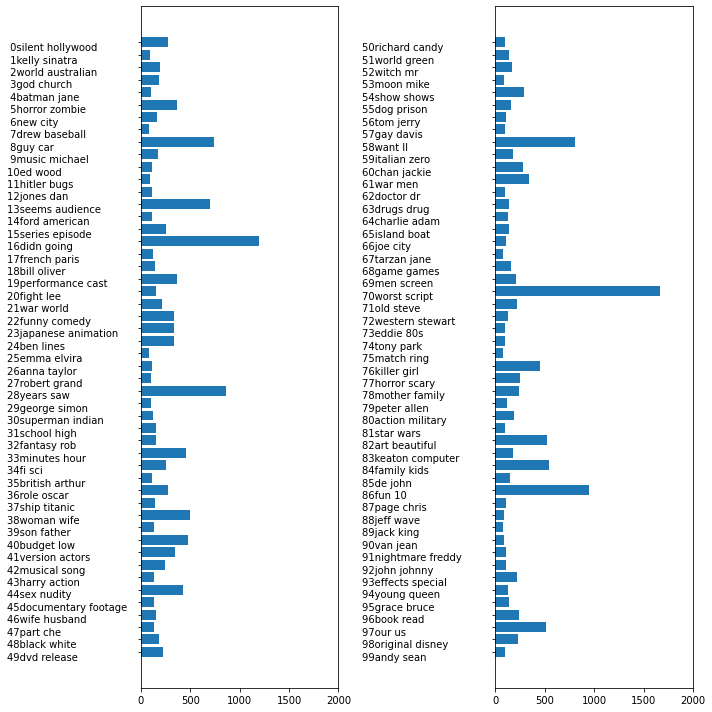

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10,10))
topic_names = ["{:>2}".format(i) + " ".join(words) for i, words in enumerate(feature_names[sorting[:,:2]])]

for col in [0,1]:
    start = col * 50
    end = (col+1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha='left', va='top')
    ax[col].invert_yaxis()
    ax[col].set_xlim(0,2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)

plt.tight_layout()